# Simple Multiple Linear Regression Pipeline Without using ScikitLearn

In [ ]:

def multiple_linear_regression(X, y, num_iter=1000, learning_rate=0.1,
                               tol=1e-6, verbose=True):
    """
    Batch gradient descent for linear regression with multiple features.

    Parameters
    ----------
    X : np.ndarray, shape (m, n)
        Feature matrix.
    y : np.ndarray, shape (m,)
        Target values.
    num_iter : int
        Maximum number of iterations.
    learning_rate : float
        Step size (alpha).
    tol : float
        Convergence threshold on gradient norm.
    verbose : bool
        Whether to print progress.

    Returns
    -------
    costs : list of float
        Cost at each iteration.
    weights : list of np.ndarray
        History of weight vectors.
    biases : list of float
        History of bias terms.
    """
    m, n = X.shape
    w = np.random.randn(n)       # (n,)
    b = np.random.randn()        # scalar

    costs, weights, biases = [], [], []

    for i in range(num_iter):
        # --- Forward pass ---
        y_hat = X @ w + b              # (m,)
        error = y_hat - y              # (m,)
        cost = (error @ error) / (2 * m)

        # --- Gradients ---
        grad_w = (X.T @ error) / m     # (n,)
        grad_b = np.mean(error)        # scalar

        # --- Convergence check based on gradient ---
        grad_norm = np.linalg.norm(grad_w)
        if grad_norm < tol and abs(grad_b) < tol:
            if verbose:
                print(f"Converged at iteration {i} (gradient norm = {grad_norm:.2e})")
            break

        # --- Parameter update ---
        w = w - learning_rate * grad_w
        b = b - learning_rate * grad_b

        # --- Tracking ---
        costs.append(cost)
        weights.append(w.copy())
        biases.append(b)

        if verbose and i % 100 == 0:
            print(f"Iter {i:4d} | Cost = {cost:.6f} | Grad Norm = {grad_norm:.2e}")

    return np.array(costs), np.array(weights), np.array(biases)
    

In [ ]:
# Fake data for testing
np.random.seed(0)
X = np.random.randn(100, 3)
true_w = np.array([1.5, -2.0, 0.7])
true_b = 0.5
y = X @ true_w + true_b + 0.1 * np.random.randn(100)

# Run the optimizer
costs, weights, biases = multiple_linear_regression(X, y, learning_rate=0.05)

# Multiple Linear Regression PipeLine using Scikit-Learn 

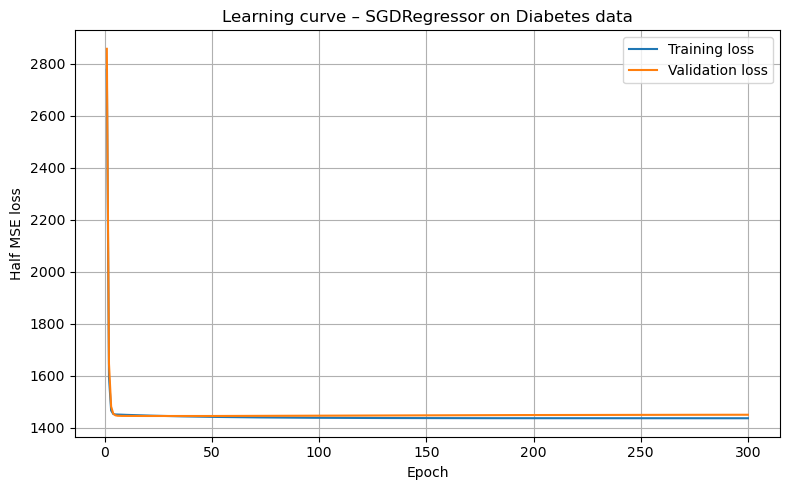

Final weights shape      : (10,)
Intercept (Bias)               : 153.862
Epochs actually completed: 1
Total weight updates     : 354.0


In [5]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# 1) Load data
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target        # (442 samples, 10 features)

# 2) Train / validation split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3) Feature scaling (mean = 0, std = 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)

# 4) SGDRegressor — one epoch at a time
sgdr = SGDRegressor(
    max_iter=1,          # exactly one epoch per .fit()
    learning_rate="invscaling",
    eta0=0.01,
    tol=None,            # disable automatic early-stop
    shuffle=True,
    random_state=0,
    warm_start=True      # keep weights between .fit() calls
)

n_epochs = 300
train_losses, val_losses = [], []

for epoch in range(n_epochs):
    sgdr.fit(X_train_scaled, y_train)          # 1 epoch
    y_pred_train = sgdr.predict(X_train_scaled)
    y_pred_val   = sgdr.predict(X_val_scaled)

    # Half-MSE = objective used by SGDRegressor
    train_loss = mean_squared_error(y_train, y_pred_train) / 2
    val_loss   = mean_squared_error(y_val,   y_pred_val)   / 2

    train_losses.append(train_loss)
    val_losses.append(val_loss)

# 5) Plot learning curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_epochs + 1), train_losses, label="Training loss")
plt.plot(range(1, n_epochs + 1), val_losses,   label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Half MSE loss")
plt.title("Learning curve – SGDRegressor on Diabetes data")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# 6) Final diagnostics
print(f"Final weights shape      : {sgdr.coef_.shape}")
print(f"Intercept (Bias)               : {sgdr.intercept_[0]:.3f}")
print(f"Epochs actually completed: {sgdr.n_iter_}")
print(f"Total weight updates     : {sgdr.t_}")
